In [2]:
FILE_PATHS = ["stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10131_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10444_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10538_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10633_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10738_2012_2021.csv",
              "stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10929_2012_2021.csv"]

In [3]:
import pandas as pd

data = [pd.read_csv(FILE_PATHS[i]) for i in range(len(FILE_PATHS))]

print(FILE_PATHS[0])
data[0].head()

stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10131_2012_2021.csv


,Begindatumtijd,NH3,NO2,PM10,Lat,Lon,Station,day,yearday,hour
0,2012/01/01 00:00,NaN,8.33,26.810,51.54052,5.85307,NL10131,7,1,0
1,2012/01/01 01:00,NaN,7.89,23.558,51.54052,5.85307,NL10131,7,1,1
2,2012/01/01 02:00,NaN,6.03,18.314,51.54052,5.85307,NL10131,7,1,2
3,2012/01/01 03:00,NaN,4.81,7.070,51.54052,5.85307,NL10131,7,1,3
4,2012/01/01 04:00,5.16,4.53,10.070,51.54052,5.85307,NL10131,7,1,4


In [4]:
from datetime import datetime
import math

weeks = [[0 for m in range(24*7)] for m in range(len(FILE_PATHS))]
lens = [[0 for m in range(24*7)] for m in range(len(FILE_PATHS))]

for i, file in enumerate(data):
    print("processing file: ", FILE_PATHS[i])
    for j, row in file.iterrows():
        hour = row["hour"]
        day = int(row["day"]) - 1        
        dayhour = hour + (day * 24)

        value = row["NH3"]

        if not math.isnan(value):
            weeks[i][dayhour] += value
            lens[i][dayhour] += 1


processing file:  stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10131_2012_2021.csv
processing file:  stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10444_2012_2021.csv
processing file:  stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10538_2012_2021.csv
processing file:  stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10633_2012_2021.csv
processing file:  stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10738_2012_2021.csv
processing file:  stations_2012_2021_NH3_NO2_PM10_PM25_formatted/transformed_NL10929_2012_2021.csv


In [5]:
for i in range(len(weeks)):
    for j in range(len(weeks[i])):
        weeks[i][j] = weeks[i][j] / lens[i][j]

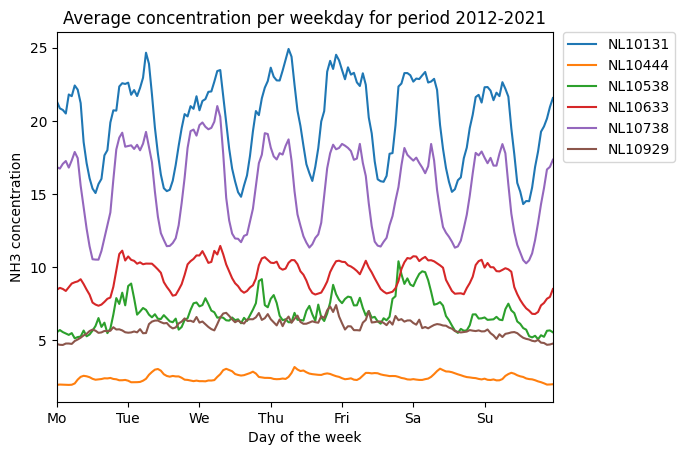

In [7]:
import matplotlib.pyplot as plt

station_names = ["NL10131",
            "NL10444",
            "NL10538",
            "NL10633",
            "NL10738",
            "NL10929"]
x_tick = [(n*24) for n in range(7)]
x_label = ['Mo', 'Tue', 'We', 'Thu', 'Fri', 'Sa', 'Su']

# add the data to the plot
for b in range(len(FILE_PATHS)):
    plt.plot(weeks[b], label=station_names[b])

# Titles and axes
plt.title("Average concentration per weekday for period 2012-2021")
plt.ylabel("NH3 concentration")
plt.xticks(x_tick, x_label)
plt.xlabel("Day of the week")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.margins(x=0)
plt.show()
